# Neural Networks 

**A note on this document**
This document is known as a Jupyter notebook; it allows text and executable code to coexist in a very easy-to-read format. Blocks can contain text or executable code. For blocks containing code, press `Shift + Enter`, `Ctrl+Enter`, or click the arrow on the block to run the code. Earlier blocks of code need to be run for the later blocks of code to work.

## Iris Flowers

In classification problems, the output space consists of a set of $C$ labels, which are referred to as `classes`. This set is denoted as $\mathcal{Y} = \{1, 2, \ldots, C\}$. The task of predicting the class label based on an input is commonly known as `pattern recognition`. When there are only two classes, they are often represented as $y \in \{0, 1\}$ or $y \in \{-1, +1\}$, and this specific scenario is called `binary classification`.

For instance, let's consider the task of classifying Iris flowers into their three subspecies: Setosa, Versicolor, and Virginica. The figure below showcases an example from each of these classes.

<div>
<img src="./figures/iris.png" width="600"/>
</div>
Three types of Iris flowers: Setosa (L), Versicolor (C), and Virginica (R). 



The features of the Iris dataset are: sepal length, sepla widht, petal length, petal width.  

In [10]:
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()

print(iris.feature_names)
print(iris.target_names)
## Iris Flowers

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


The Iris dataset is a collection of 150 labeled examples of Iris flowers, 50 of each type, described by these 4 features.

In [11]:
import pandas as pd
import numpy as np

X = iris.data
y = iris.target

# Convert to pandas dataframe
df = pd.DataFrame(data=X, columns=iris.feature_names)
df["label"] = pd.Series(iris.target_names[y], dtype="category")

df.head

<bound method NDFrame.head of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8  

For tabular data with a small number of features, it is common to make a `pair plot`, in which panel $(i, j)$ shows a scatter plot of variables $i$ and $j$, and the diagonal entries $(i,i)$ show the marginal density of variable $i$.

c:\Users\stanbaek\git\ece487-classroom-ece487_wksp\.venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


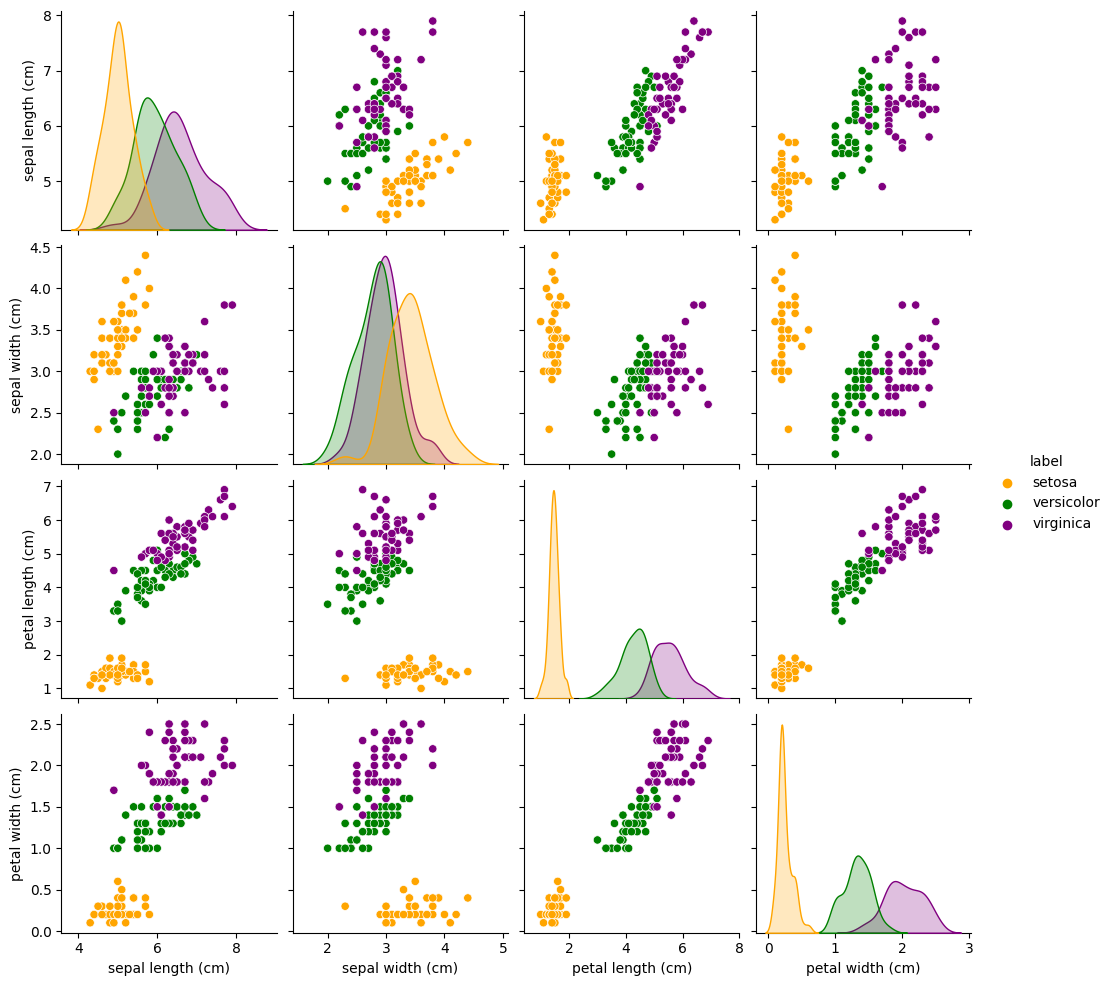

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# we pick a color map to match that used by decision tree graphviz
palette = {"setosa": "orange", "versicolor": "green", "virginica": "purple"}

g = sns.pairplot(df, vars=df.columns[0:4], hue="label", palette=palette)
plt.show()

The figure above clearly shows that Iris setosa can be readily classified, whereas distinguishing between Iris versicolor and Iris virginica is more challenging.

`Standardization` is a preprocessing technique that rescales the features so that they have the properties of a `standard normal distribution with a mean of 0 and a standard deviation of 1`. This is important in machine learning because it ensures that the features are on a similar scale, preventing some features from dominating the learning process simply because they have larger magnitudes.

The `StandardScaler` in scikit-learn works by calculating the mean and standard deviation of each feature in the training set and then transforming the data based on these statistics. The formula for standardization is:

$$ Standardized Value = \frac{Original Value − Mean}{ Standard Deviation}$$

The purpose of standardization is to make the features of the dataset comparable and to ensure that they all contribute equally to the model training. It is particularly important when working with algorithms that are sensitive to the scale of the input features, such as gradient-based optimization algorithms used in neural networks.

In [13]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to pandas dataframe
df_scaled = pd.DataFrame(data=X_scaled, columns=iris.feature_names)
df_scaled["label"] = pd.Series(iris.target_names[y], dtype="category")
df_scaled.head

<bound method NDFrame.head of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0            -0.900681          1.019004          -1.340227         -1.315444   
1            -1.143017         -0.131979          -1.340227         -1.315444   
2            -1.385353          0.328414          -1.397064         -1.315444   
3            -1.506521          0.098217          -1.283389         -1.315444   
4            -1.021849          1.249201          -1.340227         -1.315444   
..                 ...               ...                ...               ...   
145           1.038005         -0.131979           0.819596          1.448832   
146           0.553333         -1.282963           0.705921          0.922303   
147           0.795669         -0.131979           0.819596          1.053935   
148           0.432165          0.788808           0.933271          1.448832   
149           0.068662         -0.131979           0.762758          0.790671  

Let's use the `train_test_split` function in scikit-learn to split the dataset into a **training set** and a **testing (or validation) set**. 

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

`MLPClassifier` stands for Multi-Layer Perceptron Classifier. It is a type of artificial neural network-based classification algorithm. The term "multi-layer perceptron" refers to the architecture of the network, which consists of multiple layers of nodes (neurons) organized in a feedforward manner.

The MLPClassifier in scikit-learn has several important parameters that allow you to customize the architecture and behavior of the neural network. Here are some key parameters:

- hidden_layer_sizes (default=(100,)): This parameter defines the architecture of the neural network. It is a tuple where each element represents the number of neurons in the corresponding hidden layer. For example, hidden_layer_sizes=(10, 5) defines a network with two hidden layers, the first with 10 neurons and the second with 5.

- activation (default='relu'): Activation function for the hidden layers. Common choices include 'relu' (Rectified Linear Unit), 'logistic' (sigmoid), and 'tanh' (hyperbolic tangent).

- solver (default='adam'): Optimization algorithm to use. Common choices include 'sgd' (stochastic gradient descent), 'adam' (a popular variant of gradient descent), and 'lbfgs' (a quasi-Newton method).

- learning_rate_init (default=0.001): The initial learning rate. It controls the step size in updating the weights.

- max_iter (default=200): Maximum number of iterations. The solver iterates until convergence (determined by the tol parameter) or until this number of iterations is reached.

- random_state (default=None): Seed used by the random number generator.

- tol (default=1e-4): Tolerance for the optimization. If the change in the objective function is smaller than this value, the optimization will be considered as converged.

- verbose: If set to True, it prints progress messages to the console during training.

These are just some of the key parameters. Depending on your specific use case, you may also want to explore other parameters provided by the MLPClassifier class. It's often beneficial to experiment with different parameter values and architectures to find the combination that works best for your particular dataset and problem.

Ref: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a neural network classifier using scikit-learn's MLPClassifier
mlp = MLPClassifier(
    hidden_layer_sizes=(10,),
    max_iter=1000,
    random_state=42,
    solver="sgd",
    verbose=1,
    tol=1e-4,
    learning_rate_init=0.1,
)

# Fit the model to the training data
mlp.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = mlp.score(X_test, y_test)
print(f"Accuracy on the test set: {accuracy * 100:.2f}")


# Evaluate the performance
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}")

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Iteration 1, loss = 1.36714411
Iteration 2, loss = 1.18921901
Iteration 3, loss = 1.00875630
Iteration 4, loss = 0.85367491
Iteration 5, loss = 0.72641469
Iteration 6, loss = 0.62117297
Iteration 7, loss = 0.53514402
Iteration 8, loss = 0.46618582
Iteration 9, loss = 0.41118992
Iteration 10, loss = 0.36897772
Iteration 11, loss = 0.33749092
Iteration 12, loss = 0.31376203
Iteration 13, loss = 0.29489437
Iteration 14, loss = 0.27855658
Iteration 15, loss = 0.26350557
Iteration 16, loss = 0.24911145
Iteration 17, loss = 0.23527230
Iteration 18, loss = 0.22198951
Iteration 19, loss = 0.20918275
Iteration 20, loss = 0.19679826
Iteration 21, loss = 0.18482787
Iteration 22, loss = 0.17333673
Iteration 23, loss = 0.16244474
Iteration 24, loss = 0.15226559
Iteration 25, loss = 0.14287097
Iteration 26, loss = 0.13429254
Iteration 27, loss = 0.12654158
Iteration 28, loss = 0.11960936
Iteration 29, loss = 0.11344815
Iteration 30, loss = 0.10800310
Iteration 31, loss = 0.10322739
Iteration 32, los

In scikit-learn, a Pipeline is a way to streamline a lot of the routine processes, especially in the context of `feature preprocessing and model building`. It sequentially applies a list of transforms and a final estimator. Intermediate steps of the pipeline must be transformers (i.e., they must implement the fit and transform methods), while the final estimator only needs to implement the fit method.

The main purpose of a Pipeline is to assemble several steps that can be cross-validated together while setting different parameters. This ensures that each step in the process is applied in the correct order.

Here's a simple example using a pipeline with StandardScaler and MLPClassifier:

In [16]:
from sklearn.pipeline import make_pipeline

# Create a pipeline with StandardScaler and MLPClassifier
pipeline = make_pipeline(
    StandardScaler(),
    MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42),
)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict using the pipeline
y_pred = pipeline.predict(X_test)

print(y_pred)
print(y_test)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


We want to use 5-fold cross-validation to find accuracy scores and their average.

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


# Create an MLPClassifier and a pipeline with StandardScaler
pipeline = make_pipeline(StandardScaler(), mlp)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=5)

# Display the cross-validation scores
print("Cross-validation scores:", cv_scores)
print(f"Mean accuracy: {cv_scores.mean():.2f}")

Iteration 1, loss = 1.36430638
Iteration 2, loss = 1.18638437
Iteration 3, loss = 1.00430655
Iteration 4, loss = 0.84704254
Iteration 5, loss = 0.71719051
Iteration 6, loss = 0.61047342
Iteration 7, loss = 0.52313618
Iteration 8, loss = 0.45239689
Iteration 9, loss = 0.39527744
Iteration 10, loss = 0.35048384
Iteration 11, loss = 0.31668698
Iteration 12, loss = 0.29166899
Iteration 13, loss = 0.27259234
Iteration 14, loss = 0.25686986
Iteration 15, loss = 0.24287902
Iteration 16, loss = 0.23014230
Iteration 17, loss = 0.21853451
Iteration 18, loss = 0.20789177
Iteration 19, loss = 0.19811174
Iteration 20, loss = 0.18896397
Iteration 21, loss = 0.18024311
Iteration 22, loss = 0.17184486
Iteration 23, loss = 0.16375180
Iteration 24, loss = 0.15599896
Iteration 25, loss = 0.14862289
Iteration 26, loss = 0.14166167
Iteration 27, loss = 0.13511271
Iteration 28, loss = 0.12897770
Iteration 29, loss = 0.12326143
Iteration 30, loss = 0.11797185
Iteration 31, loss = 0.11312110
Iteration 32, los

## MNIST-784

MNIST-784 is a widely used dataset in the field of machine learning and computer vision. It stands for the "Modified National Institute of Standards and Technology" database. The MNIST dataset contains a large collection of handwritten digits (0 through 9), which are commonly used for training and testing machine learning models, especially for image classification tasks. Each image in the MNIST dataset is a grayscale image with a resolution of 28x28 pixels, resulting in 784 total pixels. These images are typically used to develop and test algorithms for digit recognition.

In [18]:
# Import necessary libraries
from sklearn import datasets
import joblib
from pathlib import Path

# Load the MNIST dataset

mnist_filename = "data/mnist_784.pkl"
path = Path(mnist_filename)

if not path.is_file():
    # download the dataset. It will take about a minute.
    mnist_dataset = datasets.fetch_openml("mnist_784")
    joblib.dump(mnist_dataset, mnist_filename)

# Load the MNIST dataset
mnist = joblib.load(mnist_filename)

# Split the data into features and labels
features = mnist.data
labels = mnist.target

# features is a pandas.core.frame.DataFrame object
print(features.info())

# labels is a pandas.core.series.Series object
print(labels.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: float64(784)
memory usage: 418.7 MB
None
<class 'pandas.core.series.Series'>
RangeIndex: 70000 entries, 0 to 69999
Series name: class
Non-Null Count  Dtype   
--------------  -----   
70000 non-null  category
dtypes: category(1)
memory usage: 68.6 KB
None


As indicated in the above information, the dataset comprises 70,000 entries. Let's display the first few entries.

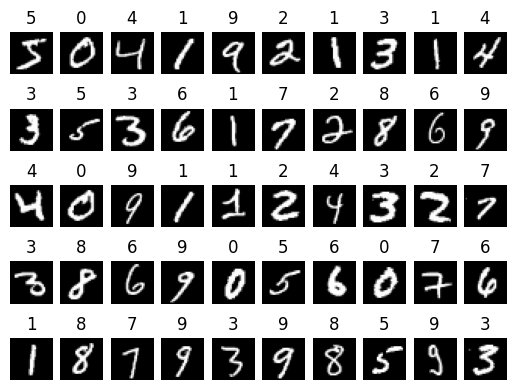

In [19]:
import matplotlib.pyplot as plt

# Reshape and display the first few images
rows = 5  # Change this value to display more images
cols = 10  # Change this value to display more images
for i in range(rows):
    for j in range(cols):
        data = features.iloc[i * cols + j]
        image = data.to_numpy().reshape(28, 28)
        plt.subplot(rows, cols, i * cols + j + 1)
        plt.imshow(image, cmap="gray")
        plt.title(f"{labels.iloc[i*cols+j]}")
        plt.axis("off")

In [20]:
# features is a pandas.core.frame.DataFrame object
print(features.shape)

print(features.head())

(70000, 784)
   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel781  pixel782  pixel783  pixel784  
0    

Let's print labels.

In [21]:
print(labels.head())

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


The very first step is to normalize the pixel values to the range [0, 1]. For the MNIST dataset, which consists of grayscale pixel values ranging from 0 to 255, normalizing by dividing all pixel values by 255 is a straightforward way to achieve this. This normalization ensures that each pixel value is between 0 and 1, making the dataset more suitable for training neural networks and other machine learning models.

In [22]:
from sklearn.model_selection import train_test_split

# Preprocess the data
features_normalized = features / 255.0  # Normalize the pixel values to the range [0, 1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features_normalized, labels, test_size=0.2, random_state=42
)

### Deliverable 2A

Complete Deliverable 1 first and come back here.


Use the SVM method to classify the handwritten digits. 

Use the `Radial Basis Function (RBF) kernel` to classify this dataset. The RBF kernel is a good choice when the decision boundary is not expected to be linear or polynomial. It is a versatile kernel for handling non-linear data.

**You can copy and paste your Lab 7 code.**

**Ensure you import necessary libraries**

Warning: It will take about 3-7 minutes.

In [23]:
# Write your code for SVM with RBF kernel that classifies the handwritten digits.
# Ensure you print out the accuracy score.

Use the following index of misclassification to display the misclassified digits.

In [24]:
mis_indices_svm = np.where(y_pred != y_test.values)[0]  # index of misclassification

# Write your code to display the first 10 misclassified digits.
# You should add the predicted values on top of the digits.
# To do this, use plt.title.

ValueError: Lengths must match.

### Deliverable 1

Use `MLPClassifier` to classify the handwritten digits.

Use the following parameters:

- one hidden layer with 100 neurons. 
- sgd for the solver
- random state = 1
- default max iterations
- default tolerance


In [ ]:
# Import necessary libraries
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report


# Write your code for multinomial Naive Bayes that classifies the handwritten digits.
# Ensure you print out the accuracy score.

### Deliverable 2B

Complete Deliverable 2A and come back here.

Let's confirm whether the digits misclassified by the SVM classifier are now correctly classified by NN. Display these misclassified digits along with their predicted values from NN. To do this, use the same `mis_indices_svm` in conjunction with the `y_pred` from the NN classifier.

In [ ]:
# Write your code to display the first 10 misclassified digits by Naive Bayes.
# You should add the predicted values by SVM on top of the digits.

Use 5-fold cross-validation to find the accuracy scores and their average.

In [ ]:
# Perform 5-fold cross-validation

### Deliverable 3

Use different parameters for `MLPClassifier`.

In [ ]:
# two hidden layers with 100 neurons each. The rest are the same as Deliverable 1.

In [ ]:
# activation function is sigmoid. The rest are the same as Deliverable 1.

In [ ]:
# learning_rate_init = default. The rest are the same as Deliverable 1.

In [ ]:
# tol is 1e-6. The rest are the same as Deliverable 1.

`Discuss your findings in terms of the number of iterations, accuracy, computational time, and the final loss.`

If you see the following message, click on `scrollable element`. 

```
Output is truncated. View as a Output is truncated. View as a scrollable element or open in a text editor. Adjust cell output settings...
```

**PUT YOUR ANSWER HERE**